This notebook outlines an engineering-economic assessment method for a global LEO satellite network.

The aim is to assess capacity per user and cost per user. 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv
import pandas as pd

Path Loss for A point on Earth and Starlink is given by
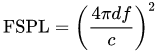
Where d=antenna diameter, f=frequency and c= speed of light

### Antenna Gain

In [2]:
def GT(D,f,n): #D=Antenna diameter in m, f=Frequency in Hertz and n= antenna efficiency usually 0.6
    c=3.0*10**8 #c=speed of light
    λ=c/f # lambda= wavelength of the signal
    gain=10*(math.log10(n*((np.pi*D)/λ)**2))
    return gain
D=0.7 #float(input("Enter Antenna Diameter in metres: "))
f=13.5 #float(input("Enter the signal frequency in GHz: "))
n=0.6 #float(input("Enter the Antenna Efficiency: "))'''
GT=37.7
print('Antenna Gain= '+str(GT)+ ' dB')

Antenna Gain= 37.7 dB


### Effective Isotropic Radiated Power (EIRP)

In [3]:
EIRP=36.7+30 #round(EIRP(),4)
print('EIRP= '+str(EIRP)+ ' dB')

EIRP= 66.7 dB


### Rain Attenuation (AL) and Other Losses (OL)

The rain attenuation is assumed to be 10dB as well as other losses thus accounting for 20dB in total.

In [4]:
RT=10 #float(input("Enter Rain Attenuation (dB): ")) #Rainfall Attenuation
'''GST=0#float(input("Enter Gaseous Attenuation (dB): ")) #Gaseous Attenuation
CT=0#float(input("Enter Cloud Attenuation (dB): ")) #Cloud Attenuation
ST=0#float(input("Scintillation Attenuation (dB): ")) #Scintillation Attenuation'''
OT=0.53#float(input("Enter Sum of other losses (dB): ")) # Other losses
TL=RT+OT                                                #TL=Total Losses
print('Total Losses= '+str(TL)+ ' dB')

Total Losses= 10.53 dB


### Noise Power (N)

In [5]:
def Noise():
    k=1.38*10**-23                     #Boltzmann's constant k = 1.38×10−23 joules per kelvin
    T=290                              #Temperature of the receiver system T0 in kelvins
    B=0.25                             #Detection bandwidth (BW) in Hz
    Np=(10*(math.log10((k*T*1000))))+(10*(math.log10(B*10**9))) #Np=Noise power
    return Np
Noise=Noise()
print('Noise Power= '+str(Noise)+ ' dB')

Noise Power= -89.9978290702777 dB


### POWER RECEIVED (PR)

In [6]:
FSLP=0               #Ignoring FSLP at first so that it can be calculated for different values
def PR():
    pr=EIRP+GT-FSLP-TL
    return pr
PR=PR()
print('Power Received= '+str(PR)+ ' dB')

Power Received= 93.87 dB


### CARRIER TO NOISE RATIO (CNR)

In [7]:
Noise=-89.9978
CNR=round(float((PR)-(Noise)),4)
print('CNR= '+str(CNR)+ ' dB')

CNR= 183.8678 dB


#### LEO SYSTEM MODEL APPLIED TO STARLINK

The subsequent function calculates the Signal to Noise Ratio, Received power and Free Space Path loss as dif

In [8]:
def starlink_capacity(Number_of_assets):
    Total_Earth_Area=510000000                      #Area of Earth
    Asset_Altitude=550                              #Altitude of starlink satellites
    Downlink_Frequency=13.5*10**9                   #Downlink frequency in Hertz
    Speed_of_light=3.0*10**8                        #Speed of light in vacuum
    wavelength=Speed_of_light/Downlink_Frequency    #Downlink Wavelength in m
    Received_power_less_FSLP=93.87                  #Received power before subtracting Free space path loss
    Carrier_to_Noise_Ratio=183.8678                 #Carrier noise ratio before subtracting noise power
    Earth_area_covered=Total_Earth_Area*0.8         #Approximate area of earth covered
    NoA=[]  #Empty array to store the number of assets
    CPUA=[] #Empty array to store the coverage per user asset
    ADA=[]  #Empty array to store Average distance between assets
    MPD=[]  #Empty array to store Maximum path distance
    FSPL=[] #Empty array to store Free Space path loss
    PR=[]   #Empty array to store Received_power
    SNR=[]  #Empty array to store Signal to Noise Ratio
    SE=[]   #Empty array for storing spevctral efficinecy
    for noa in Number_of_assets: #Return results for NoA, CPUA,ADA,MPD,FSPL,PR and SNR as satellites increase by 60
        Network_Density=noa/Earth_area_covered
        Coverage_area_per_asset=Earth_area_covered/noa
        Average_distance_between_assets=math.sqrt(((1)/Network_Density))/(2)
        Max_path_distance=math.sqrt(((Average_distance_between_assets)**2)+((Asset_Altitude)**2))
        Free_Space_path_loss=10*(math.log10(((4*np.pi*Max_path_distance*10**3)/wavelength)**2))
        Received_power=Received_power_less_FSLP-Free_Space_path_loss
        Signal_to_Noise_Ratio=Carrier_to_Noise_Ratio-Free_Space_path_loss
        
        #Calculate spectral efficiency for ever signal ratio using APSK modulation table from
        #ETSI EN 302 307-2 V1.2.1 (2020-08
        def SEP():
            if (Signal_to_Noise_Ratio>=4.73 and Signal_to_Noise_Ratio<5.12):
                spectral_efficiency=1.647211
            elif (Signal_to_Noise_Ratio>=5.13 and Signal_to_Noise_Ratio<5.96):
                spectral_efficiency=1.972253
            elif (Signal_to_Noise_Ratio>=5.97 and Signal_to_Noise_Ratio<6.54):
                spectral_efficiency=1.972253
            elif (Signal_to_Noise_Ratio>=6.55 and Signal_to_Noise_Ratio<6.83):
                spectral_efficiency=2.104850
            elif (Signal_to_Noise_Ratio>=6.84 and Signal_to_Noise_Ratio<7.5):
                spectral_efficiency=2.193247
            elif (Signal_to_Noise_Ratio>=7.51 and Signal_to_Noise_Ratio<7.79):
                spectral_efficiency=2.281645
            elif (Signal_to_Noise_Ratio>=7.8 and Signal_to_Noise_Ratio<7.40):
                spectral_efficiency=2.370043
            elif (Signal_to_Noise_Ratio>=7.41 and Signal_to_Noise_Ratio<8.0):
                spectral_efficiency=2.370043
            elif (Signal_to_Noise_Ratio>=8.1 and Signal_to_Noise_Ratio<8.37):
                spectral_efficiency=2.458441
            elif (Signal_to_Noise_Ratio>=8.38 and Signal_to_Noise_Ratio<8.42):
                spectral_efficiency=2.524739
            elif (Signal_to_Noise_Ratio>=8.43 and Signal_to_Noise_Ratio<9.26):
                spectral_efficiency=2.635236
            elif (Signal_to_Noise_Ratio>=9.27 and Signal_to_Noise_Ratio<9.70):
                spectral_efficiency=2.745734
            elif (Signal_to_Noise_Ratio>=9.71 and Signal_to_Noise_Ratio<10.64):
                spectral_efficiency=2.856231
            elif (Signal_to_Noise_Ratio>=10.65 and Signal_to_Noise_Ratio<11.98):
                spectral_efficiency=3.077225
            elif (Signal_to_Noise_Ratio>=11.99 and Signal_to_Noise_Ratio<11.09):
                spectral_efficiency=3.386618
            elif (Signal_to_Noise_Ratio>=11.1 and Signal_to_Noise_Ratio<11.74):
                spectral_efficiency=3.291954
            elif (Signal_to_Noise_Ratio>=11.75 and Signal_to_Noise_Ratio<12.16):
                spectral_efficiency=3.510192
            elif (Signal_to_Noise_Ratio>=12.17 and Signal_to_Noise_Ratio<13.04):
                spectral_efficiency=3.620536
            elif (Signal_to_Noise_Ratio>=13.05 and Signal_to_Noise_Ratio<13.97):
                spectral_efficiency=3.841226
            elif (Signal_to_Noise_Ratio>=13.98 and Signal_to_Noise_Ratio<14.8):
                spectral_efficiency=4.206428
            elif (Signal_to_Noise_Ratio>=14.81 and Signal_to_Noise_Ratio<15.46):
                spectral_efficiency=4.338659
            elif (Signal_to_Noise_Ratio>=15.47 and Signal_to_Noise_Ratio<15.86):
                spectral_efficiency=4.603122
            elif (Signal_to_Noise_Ratio>=15.87 and Signal_to_Noise_Ratio<16.54):
                spectral_efficiency=4.735354
            elif (Signal_to_Noise_Ratio>=16.55 and Signal_to_Noise_Ratio<17.72):
                spectral_efficiency=4.936639
            elif (Signal_to_Noise_Ratio>=17.73 and Signal_to_Noise_Ratio<18.52):
                spectral_efficiency=5.163248
            elif (Signal_to_Noise_Ratio>=18.53 and Signal_to_Noise_Ratio<16.97):
                spectral_efficiency=5.355556
            elif (Signal_to_Noise_Ratio>=16.98 and Signal_to_Noise_Ratio<17.23):
                spectral_efficiency=5.065690
            elif (Signal_to_Noise_Ratio>=17.24 and Signal_to_Noise_Ratio<18.0):
                spectral_efficiency=5.241514
            elif (Signal_to_Noise_Ratio>=18.1 and Signal_to_Noise_Ratio<18.58):
                spectral_efficiency=5.417338
            elif (Signal_to_Noise_Ratio>=18.59 and Signal_to_Noise_Ratio<18.83):
                spectral_efficiency=5.593162
            elif (Signal_to_Noise_Ratio>=18.84 and Signal_to_Noise_Ratio<19.56):
                spectral_efficiency=5.768987
            elif (Signal_to_Noise_Ratio>=19.57):
                spectral_efficiency=5.900855
            else:
                spectral_efficiency=1
            return spectral_efficiency
        s=SEP()       
        #Store the output as lists
        NoA.append(Network_Density)
        CPUA.append(Coverage_area_per_asset)
        ADA.append(Average_distance_between_assets)
        MPD.append(Max_path_distance)
        FSPL.append(Free_Space_path_loss)
        PR.append(Received_power)
        SNR.append(Signal_to_Noise_Ratio)
        SE.append(s)
    return NoA,CPUA,ADA,MPD,FSPL,PR,SNR,SE #return as a tuple

satellites=(np.linspace(60,5040,84)).tolist() #Increase the satellites by 60 until 5000 have been launched
Number_of_assets=satellites
#starlink_capacity(Number_of_assets)
#NoA_=sc[0]

In [9]:
NoA_,CPUA_,ADA_,MPD_,FSPL_,PR_,SNR_,SE_,=starlink_capacity(Number_of_assets)

In [10]:
from pandas import DataFrame

#Converting the Outputs into Dataframes

df = DataFrame (NoA_,columns=['Number of Assets'])
df1=DataFrame (CPUA_,columns=['Coverage Area per Asset (km2)'])
df2=DataFrame (ADA_,columns=['Average Distance Between Assets(km)'])
df3=DataFrame (MPD_,columns=['Maximum Path Distance (km)'])
df4=DataFrame (FSPL_,columns=['Free Space Path Loss (dB)'])
df5=DataFrame (PR_,columns=['Received Power (dB)'])
df6=DataFrame (SNR_,columns=['Signal to Noise Ratio (dB)'])
df7=DataFrame (SE_,columns=['Spectral Efficiency (bps/Hz)'])

#Merging the dataframes into one
comb = pd.merge(df,df1, right_index=True, left_index=True)
comb1 = pd.merge(df2,df3, right_index=True, left_index=True)
comb2= pd.merge(df4,df5, right_index=True, left_index=True)
comb3=pd.merge(comb,comb1, right_index=True, left_index=True)
comb4=pd.merge(comb3,comb2, right_index=True, left_index=True)
comb5=pd.merge(comb4,df6, right_index=True, left_index=True)
comb6=pd.merge(comb5,df7, right_index=True, left_index=True)
comb6

,Number of Assets,Coverage Area per Asset (km2),Average Distance Between Assets(km),Maximum Path Distance (km),Free Space Path Loss (dB),Received Power (dB),Signal to Noise Ratio (dB),Spectral Efficiency (bps/Hz)
0,1.470588e-07,6.800000e+06,1303.840481,1415.097170,178.064173,-84.194173,5.803627,1.972253
1,2.941176e-07,3.400000e+06,921.954446,1073.545528,175.664857,-81.794857,8.202943,2.458441
2,4.411765e-07,2.266667e+06,752.772653,932.291085,174.439478,-80.569478,9.428322,2.745734
3,5.882353e-07,1.700000e+06,651.920241,852.936105,173.666778,-79.796778,10.201022,2.856231
4,7.352941e-07,1.360000e+06,583.095189,801.560977,173.127179,-79.257179,10.740621,3.077225
...,...,...,...,...,...,...,...,...
79,1.176471e-05,8.500000e+04,145.773797,568.990334,170.150545,-76.280545,13.717255,3.841226
80,1.191176e-05,8.395062e+04,144.871165,568.759751,170.147025,-76.277025,13.720775,3.841226
81,1.205882e-05,8.292683e+04,143.985094,568.534702,170.143587,-76.273587,13.724213,3.841226
82,1.220588e-05,8.192771e+04,143.115086,568.314990,170.140230,-76.270230,13.727570,3.841226


### DATA VISUALIZATION

In [11]:
def plotting_function1_isd(data):

    data_subset = data[['inter_site_distance_km','frequency_GHz','path_loss_dB',
    'received_power_dB', 'interference_dB', 'sinr_dB', 'spectral_efficiency_bps_hz',
    'capacity_mbps_km2']]

    data_subset.columns = ['Inter-Site Distance (km)', 'Frequency (GHz)', 'Path Loss',
        'Received Power', 'Interference', 'SINR', 'SE',
        'Channel Capacity']

    long_data = pd.melt(data_subset,
        id_vars=['Inter-Site Distance (km)', 'Frequency (GHz)'],
        value_vars=['Path Loss', 'Received Power', 'Interference',
            'SINR', 'SE', 'Channel Capacity'])

    long_data.columns = ['Inter-Site Distance (km)', 'Frequency (GHz)',
        'Metric', 'Value']

    sns.set(font_scale=1.1)

    plot = sns.relplot(x="Inter-Site Distance (km)", y='Value', hue="Frequency (GHz)",
        col="Metric", col_wrap=2, palette=sns.color_palette("husl", 6),
        kind="line", data=long_data,
        facet_kws=dict(sharex=False, sharey=False),
        legend="full")

    handles = plot._legend_data.values()
    labels = plot._legend_data.keys()
    plot._legend.remove()
    plot.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=7)

    plot.axes[0].set_ylabel('Path Loss (dB)')
    plot.axes[1].set_ylabel('Received Power (dBm)')
    plot.axes[2].set_ylabel('Interference (dBm)')
    plot.axes[3].set_ylabel('SINR (dB)')
    plot.axes[4].set_ylabel('SE (Bps/Hz)')
    plot.axes[5].set_ylabel('Capacity (Mbps km^2)')

    plot.axes[0].set_xlabel('Inter-Site Distance (km)')
    plot.axes[1].set_xlabel('Inter-Site Distance (km)')
    plot.axes[2].set_xlabel('Inter-Site Distance (km)')
    plot.axes[3].set_xlabel('Inter-Site Distance (km)')
    plot.axes[4].set_xlabel('Inter-Site Distance (km)')
    plot.axes[5].set_xlabel('Inter-Site Distance (km)')

    plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.07)

    plot.savefig(DATA_OUTPUT + '/frequency_capacity_barplot_isd.png', dpi=300)

    return print('completed (frequency) barplot (isd)')